In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train.csv")
train = train.drop(["nonclk"],axis=1)

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [5]:
train.head()

,user,time_stamp,adgroup_id,pid,clk
0,286630,1494218579,13,430539_1007,0
1,286630,1494289247,13,430539_1007,0
2,26279,1494478631,38,430539_1007,0
3,683451,1494229042,85,430539_1007,0
4,738208,1494198871,102,430548_1007,0


In [4]:
ad_feature.describe()

,adgroup_id,cate_id,campaign_id,customer,brand,price
count,846811.000000,846811.000000,846811.000000,846811.000000,600481.000000,8.468110e+05
mean,423406.000000,5868.593464,206552.604280,113180.406006,229254.422596,1.838867e+03
std,244453.423738,2705.171203,125192.340908,73435.834950,132288.849633,3.108877e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000e-02
25%,211703.500000,4383.000000,97583.000000,47960.000000,110616.000000,4.900000e+01
50%,423406.000000,6183.000000,200780.000000,107278.000000,234423.000000,1.390000e+02
75%,635108.500000,7047.000000,314565.500000,172013.500000,344818.000000,3.520000e+02
max,846811.000000,12960.000000,423436.000000,255875.000000,461497.000000,1.000000e+08


In [5]:
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test.csv")

In [ ]:
sample = train

In [ ]:
join1 = sample.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")

In [ ]:
join2 = join1.join(user_profile.set_index("userid"),on="user")

C:\Users\Leo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


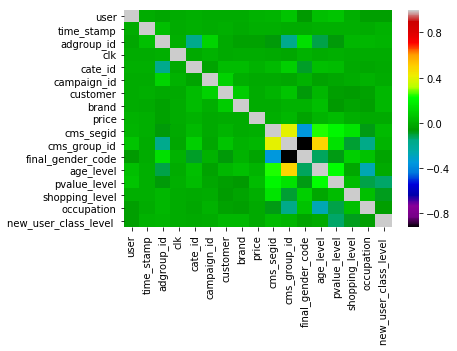

In [87]:
corr = join2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="spectral")

In [ ]:
#merge test
test1 = test.join(user_profile.set_index("userid"),on="user")
test1 = test1.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(join2.pid)
join2.pid = le.transform(join2.pid)
test1.pid = le.transform(test1.pid)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
gnb = lgb.LGBMClassifier()
drop = ["clk",]
train_set = join2.drop(drop,axis=1)
test_set = test1.drop(["brand"],axis=1)
test1= test1.fillna(-1)
train_set = train_set.fillna(-1)

In [ ]:
model = gnb.fit(train_set,join2.clk)
pred = model.predict(test_set)

In [ ]:
submission = pd.DataFrame({"id":test1.id,"clk":pred})
submission.to_csv("NaiveBayesPrediction.csv",index=False)

In [ ]:
submission.describe()

## Analysis Behavior Log

In [6]:
behavior_log.head()

,user,time_stamp,btag,cate,brand
0,308688,1493820198,pv,6408,258638
1,591909,1493814087,pv,5744,321326
2,876901,1493797178,pv,7621,104107
3,876901,1493797679,pv,7621,104107
4,57178,1493744427,pv,7205,167727


In [29]:
s = behavior_log.sample(n=1)
s

,user,time_stamp,btag,cate,brand,unix,weekday
1121281,72838,1493568711,pv,6423,45948,2017-04-30 16:11:51,6


In [30]:
pd.to_datetime(s.time_stamp, unit="s").dt.hour

1121281    16
Name: time_stamp, dtype: int64

In [18]:
behavior_log["unix"]=pd.to_datetime(behavior_log.time_stamp,unit="s")

In [31]:
behavior_log["weekday"]=behavior_log.unix.dt.weekday
behavior_log["hour"]=behavior_log.unix.dt.hour


In [36]:
behavior_log["weekend"] = behavior_log.weekday >= 5

In [33]:
behavior_log.describe()

,user,time_stamp,cate,brand,weekday,hour
count,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07
mean,5.768753e+05,1.493774e+09,5.704339e+03,2.125735e+05,3.060469e+00,9.484853e+00
std,3.278639e+05,6.313171e+06,2.522228e+03,1.330231e+05,2.007559e+00,5.706902e+00
min,1.000000e+01,-2.101140e+09,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.923620e+05,1.493303e+09,4.314000e+03,9.401200e+04,1.000000e+00,5.000000e+00
50%,5.795260e+05,1.493816e+09,6.183000e+03,2.046970e+05,3.000000e+00,9.000000e+00
75%,8.566440e+05,1.494256e+09,6.508000e+03,3.262820e+05,5.000000e+00,1.400000e+01
max,1.141723e+06,1.727021e+09,1.297600e+04,4.615270e+05,6.000000e+00,2.300000e+01


In [37]:
behavior_log.head()

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False


In [38]:
buys = behavior_log[behavior_log.btag == "buy"]

In [39]:
buysGroup = buys.groupby(["user"])

In [40]:
buysPerUser = pd.DataFrame()

In [ ]:
#for name,group  in buysGroup:
#    print(name)
#    print(group)